# D214: Performance Assessment - Task 2
***

### By: Leng Yang
### Student ID: 012298452
### Date: November 7, 2024
***
<br>
<br>
<br>

## Table of Contents
* [A. Research Question](#A)
* [B. Data Collection](#B)
* [C. Data Extraction and Preparation](#C)
* [D. Analysis](#D)
* [E. Data Summary and Implications](#E)
* [F. Sources](#F)

<BR>

<BR>

<BR>

<BR>

<BR>

<BR>

<BR>

<BR>

<BR>

<BR>

<BR>

## A. Research Question <a class="anchor" id="A"></a>

The research question for this capstone project is "What attributes significantly influence the sales price of cubic zirconia?"

The justification for this analysis is based on the standards with which gemstones are valued. Initially authored by Robert M. Shipley, the 4Cs of quality are color, clarity, cut, and carat weight (Gemological Institute of America, 2017). These factors set the standard for how modern gemstones are graded and valued. Cubic zirconia, which is a lab-grown diamond simulant made of zirconium dioxide instead of pure carbon, has close similarities to that of a diamond in that both gemstones are colorless and give off a similar shine under light (Antolik, 2022). Given the similarity between these gemstones, evaluating these attributes/factors can further be expanded to explore those of cubic zirconia. Furthermore, understanding how these attributes may influence the overall value of the gemstone also gives better insights into the potential profitability of sales. Further expanding on this notion, this understanding would allow better insights into distinguishing between stones of higher and lower profitability, thus leading to better profit shares.

The following are the established null and alternative hypotheses for this analysis:

__Null Hypothesis__: There is no significant association between the cubic zirconia attributes and the sales price.

__Alternative Hypothesis__: There is a significant association between at least one of the cubic zirconia attributes and the sales price.

The null hypothesis assumes no significant association between the gemstone's attributes and the sales price. This suggests that any observed relationship is by chance, with no underlying connections. In contrast, the alternative hypothesis states a significant association between at least one of the gemstone's attributes and the sales price. This suggests that one of the attributes is significantly associated with understanding the sales price.

<BR>

## B. Data Collection <a class="anchor" id="B"></a>

The data was obtained from Kaggle and is provided by the Co-learning Lounge, a community of learners that provides modified datasets for machine learning and deep learning purposes (Co-learning Lounge, 2021). The dataset contains 26,967 records and 11 variables. Below is a list of the variables and a short description of each.

* Record number: serial record number of each gemstone
* Carat: carat weight of the cubic zirconia
* Cut: cut quality with increasing order from fair, good, very good, premium, to ideal
* Color: the color, with D being the best and J the worst
* Clarity: refers to the absence of the inclusions and blemishes (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3)
* Depth: the height, as measured from the culet to the table, divided by the average girdle diameter
* Table: the width of the cubic zirconia's table, expressed as a percentage of its average diameter
* X: length of the cubic zirconia in mm
* Y: width of the cubic zirconia in mm
* Z: height of the cubic zirconia in mm
* Price: the price of the cubic zirconia

One advantage of the data collection method is that the data is available in a structured format. The original data file is kept as a CSV file, so it is easy to load it into a tabular format for analysis. In contrast, one of the primary disadvantages is regarding the datasets on Kaggle. As Kaggle hosts open datasets, there is no sure way to verify the integrity of every dataset published on this website. This creates limitations on how reliable some of the datasets are. For this dataset, one limitation is the lack of a detailed background of the data, where there is not much information besides understanding that the author of the data posts datasets primarily for learning purposes. This is an important consideration to keep in mind for this analysis.

<BR>

## C. Data Extraction and Preparation <a class="anchor" id="C"></a>

The data was extracted and prepared in a Jupyter Notebook environment using the Python programming language. The primary advantage of using a Jupyter Notebook to develop analysis is the interactivity within the environment. This interactivity allows users to view code and results simultaneously. Additionally, the environment enables code to be broken down into smaller snippets, allowing users to build and test their code in an iterative process. This process is critical in analysis, where data manipulation results must be verified to ensure the proper preparation steps are taken. A disadvantage to Jupyter Notebooks is that variables persist in the background within the environment once created, so users have to be careful as these variables may result in unexpected outcomes. One way to combat this is to restart the kernel/notebook, which resets the entire environment to a clean slate.

As stated previously, the data was cleaned and prepared using Python. The primary advantage of Python is that it contains many open-source libraries for data analysis and data science. Two prominent libraries used for the data cleaning and preparation process are Pandas and Sci-kit Learn. The Pandas library can load external data files into a tabular format. This format allows for better data exploration and manipulation, especially during data cleaning. Sci-kit Learn is a library with many uses in data analysis, but for this purpose, it will be used to split the data into training and testing sets. The training dataset will be used to train a model, whereas the testing set will be used to evaluate how well the model performs. A disadvantage of using only a single training and test split is that it can create a high variance estimate of the results. One way to combat this is to utilize cross-validation instead, as it splits the dataset multiple times, thus averaging results based on the number of folds implemented. One primary disadvantage of Python is that it is slower than other programming languages, such as C++ or Java. This performance issue could be critical when dealing with extremely large datasets (PFES, n.d.).

The data file was first loaded into a Pandas DataFrame, and the column containing the sequence numbers was dropped due to its redundancy. The columns were then renamed for clarity by the data dictionary. Next, records containing null values were removed, and the data was verified to ensure no remaining null values were present. The descriptive statistics for the numerical variables were looked at, and it was found that there were zero values for the length, width, and height. Records containing these values were dropped as these were deemed logically impossible. Boxplots were used to explore and look for any extreme outliers visually. It was found that there was a singular extreme outlier for the `width` variable, so the record containing this value was dropped. All other outliers seemed reasonable and were kept due to a lack of domain knowledge.

Once the data was cleaned, it was prepared before any modeling was performed. The categorical variables were all ordinal, so each was numerically label-encoded in alignment with the data dictionary. Once data preparations were complete, the data was split into training and testing sets using an 80/20 split.

In [10]:
#Import libraries used for data cleaning and preparation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

#Load in data file
df = pd.read_csv('cubic_zirconia.csv')

#Drop redundant column and rename columns for clarity
df.drop('Unnamed: 0', axis=1, inplace=True)
df.rename(columns={'x':'length', 'y':'width', 'z':'height'}, inplace=True)

In [11]:
#Check and remove null values
print(df.isna().sum())
df.dropna(inplace=True)

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
length       0
width        0
height       0
price        0
dtype: int64


In [12]:
#Verify no remaining null values
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
length     0
width      0
height     0
price      0
dtype: int64

In [13]:
#Check for and drop any duplicate records
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

34


In [14]:
#Verify no duplicates remain
df.duplicated().sum()

0

In [15]:
#Check descriptive statistics of numerical variables
df.describe()

,carat,depth,table,length,width,height,price
count,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000
mean,0.797620,61.745285,57.455877,5.728646,5.732487,3.536339,3935.926818
std,0.476691,1.412243,2.230866,1.126332,1.165283,0.698608,4019.809223
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2374.000000
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


In [16]:
#Drop values that are contextually physically impossible
df = df.drop(df[(df.length == 0) | (df.width == 0) | (df.height == 0)].index)

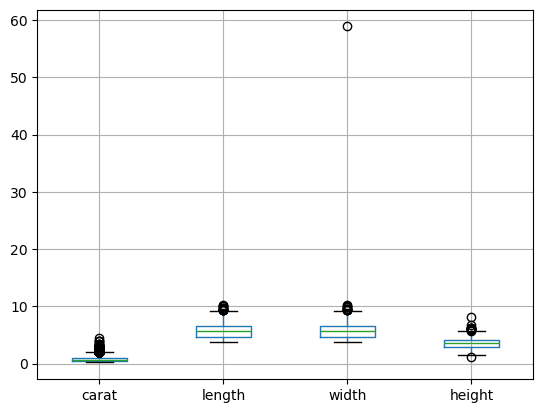

In [17]:
#Visually explore for outliers
df.boxplot(column=['carat','length','width','height']);

In [18]:
#Remove record containing the extreme outlier for the 'width' variable
df = df.drop(df[df.width > 50].index)

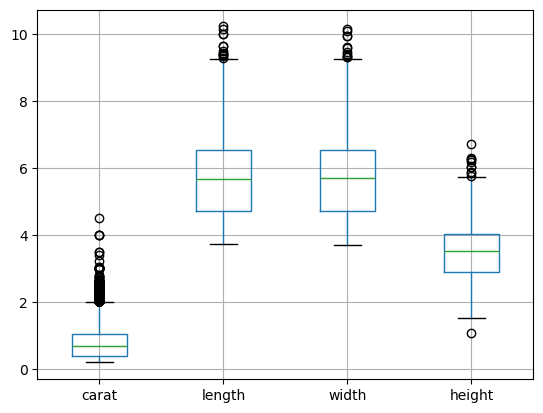

In [19]:
#Visually explore for outliers
df.boxplot(column=['carat','length','width','height']);

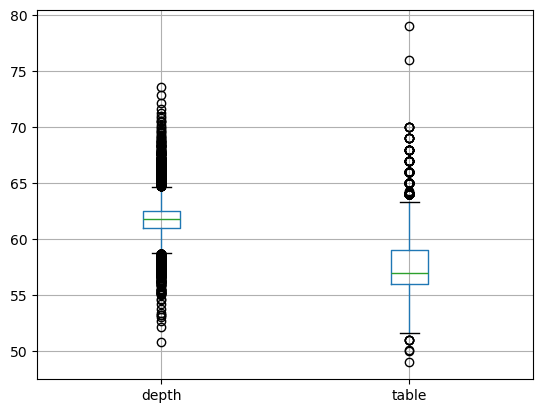

In [20]:
#Visually explore for outliers
df.boxplot(column=['depth','table']);

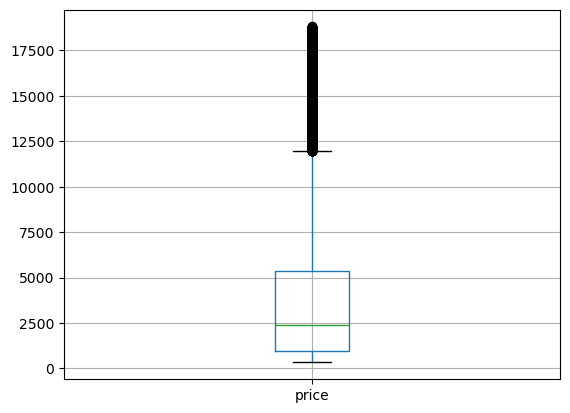

In [21]:
df.boxplot(column='price');

In [23]:
#Label encode categorical variables due to ordinal nature of each. This is also done so that these inputs can be accepted into the regression model.

#Create ordinal labels for each categorical variable based on data dictionary
cut_map = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color_map = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity_map = {'I3':1, 'I2':2, 'I1':3, 'SI2':4, 'SI1':5, 'VS2':6, 'VS1':7, 'VVS2':8, 'VVS1':9, 'IF':10, 'FL':11}

#Label encode categorical variables
df.cut = df.cut.map(cut_map)
df.color = df.color.map(color_map)
df.clarity = df.clarity.map(clarity_map)

In [24]:
#Checking dataset after complete transformations
df.head()

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,5,6,5,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,10,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,6,8,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,5,7,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,5,9,60.4,59.0,4.35,4.43,2.65,779


In [25]:
#Define X and y parameters
X = df.drop('price', axis=1)
y = df.price

#Split data into training and testing sets using an 80/20 ratio and set random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20981, 9)
(5246, 9)
(20981,)
(5246,)


<BR>

## D. Analysis <a class="anchor" id="D"></a>

Multiple linear regression was chosen to analyze the data due to its ease of understanding. This simplicity is an advantage as it allows results to be easily communicated across audiences with different levels of knowledge. One disadvantage to this technique comes from the bias-variance tradeoff that is incurred. Due to the simplicity of the technique, there is low bias but high variance as it makes strong assumptions about the relationship between the independent and dependent variables, in that there is a linear relationship. The high variance of the technique can cause estimates to be further off than other analytical techniques.

Some assumptions are to be met when performing linear regression. These include checking for multicollinearity, homoscedasticity of the residuals, and multivariate normality (Bobbitt, 2021). Each feature's variance inflation factor (VIF) was examined to ensure no multicollinearity exists. A VIF is a tool used to detect multicollinearity, and scores of greater than five indicate that variables are highly correlated (The Investopedia Team, 2024). The VIF of each feature was calculated, and through an iterative process, any feature with a score of higher than five was dropped. This process left only two features: carat and color.

In [30]:
#Iinitial look at VIF scores of all variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculate VIF scores
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data

,feature,VIF
0,carat,91.665996
1,cut,17.962881
2,color,8.567528
3,clarity,17.632287
4,depth,1188.422704
5,table,847.428654
6,length,10418.260666
7,width,9094.225827
8,height,3743.542276


In [31]:
#Iteratively remove features with high VIF

#Define list of features
features = X.columns.tolist()

while True:
    #Create dataframe with features and corresponding VIF scores
    vif_data = pd.DataFrame()
    vif_data['feature'] = X_train.columns
    vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
    max_vif = vif_data["VIF"].max()
    
    #Break loop when the highest VIF score <= 5
    if max_vif <=5:
        break
        
    #Remove feature with the highest VIF score
    feature_to_remove = vif_data.loc[vif_data["VIF"].idxmax()]["feature"]
    features.remove(feature_to_remove)
    X_train = X_train[features]

In [32]:
#Check reduced feature list and VIF scores
vif_data

,feature,VIF
0,carat,2.243597
1,color,2.243597


<BR>

The statsmodels library, which contains some linear regression models, was used as it gives an excellent summary of the results. The summary of the results was printed out after an ordinary least squares regression model was trained on the training data. Afterward, a scatterplot of the fitted values and the residuals was looked at to determine the presence of homoscedasticity. The plot showed the presence of heteroscedasticity due to the cone-line shape of the residuals as the fitted values increased. Furthermore, a Q-Q plot was used to show if the residuals follow a normal distribution, resulting in a completely vertical line and indicating further issues.

In [110]:
#Import package to run MLR model
import statsmodels.api as sm

#Add constant to be used as the intercept, then instantiate and fit model
X_train = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 6.448e+04
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:47:45   Log-Likelihood:            -1.8332e+05
No. Observations:               20981   AIC:                         3.667e+05
Df Residuals:                   20978   BIC:                         3.667e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3630.6956     39.245    -92.513      0.000   -3707.619   -3553.772
carat       8069.2836     22.890    352.525      0.000    8024.418    8114.150
color        258.9248      6.393     40.501      0.000     246.394     271.456
==============================================================================
Omnibus:                     4666.951   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47709.327
Skew:                           0.777   Prob(JB):                         0.00
Kurtosis:                      10.222   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

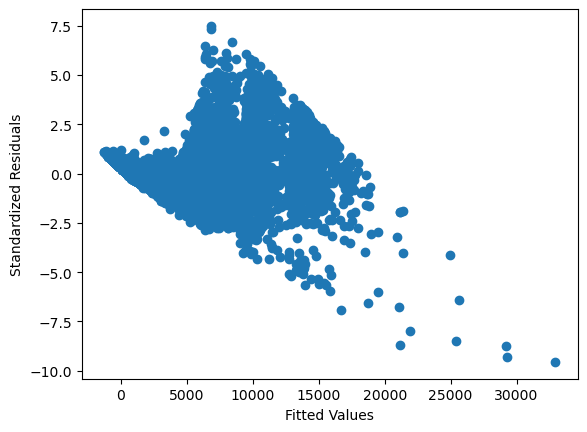

In [210]:
#Heteroscedasticity is present due to the cone-like shape present
plt.scatter(results2.fittedvalues, results2.resid / results2.resid.std())
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals');

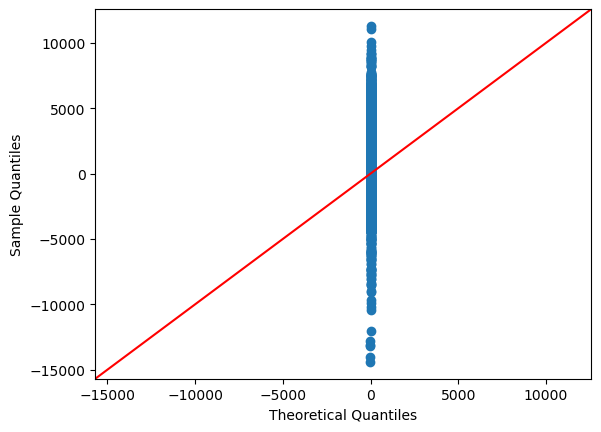

In [164]:
#Check for multivariate normality of the residuals
sm.qqplot(results2.resid, line='45');

<BR>

Log transformations were performed to combat the issues seen with heteroscedasticity and the lack of multivariate normality. The transformation was performed on both the features and the target. Once complete, a new regression model was trained on the transformed data, and the results were examined. A look at the fitted values and residuals showed better results. The residuals are much better centered, trending towards the assumption of homoscedasticity. Furthermore, the assumption of multivariate normality is better met as the Q-Q plot shows a line that better approximates a normal distribution.

In [124]:
#Transform X and y inputs
X_train_ln = np.log(X_train)
X_train_ln.const = 1
y_train_ln = np.log(y_train)

In [136]:
#Re-run log transformed model
model_ln = sm.OLS(y_train_ln, X_train_ln)
results_ln = model_ln.fit()
results_ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.825e+05
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:53:04   Log-Likelihood:                 355.26
No. Observations:               20981   AIC:                            -704.5
Df Residuals:                   20978   BIC:                            -680.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1464      0.005   1666.578      0.000       8.137       8.156
carat          1.7320      0.003    595.614      0.000       1.726       1.738
color          0.2352      0.003     67.790      0.000       0.228       0.242
==============================================================================
Omnibus:                      433.091   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              903.182
Skew:                          -0.085   Prob(JB):                    7.52e-197
Kurtosis:                       4.002   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

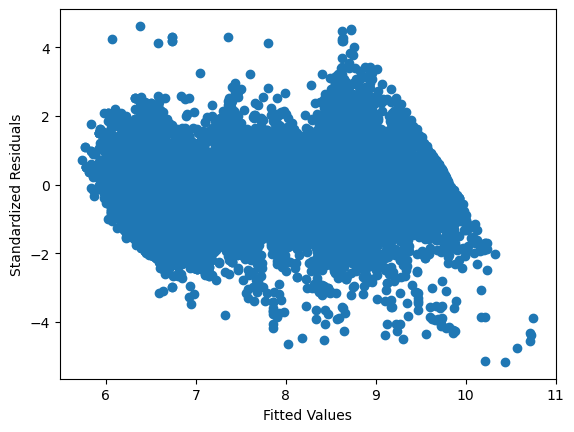

In [208]:
#Check for homoscedasticity
plt.scatter(results_ln.fittedvalues, results_ln.resid / results_ln.resid.std())
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals');

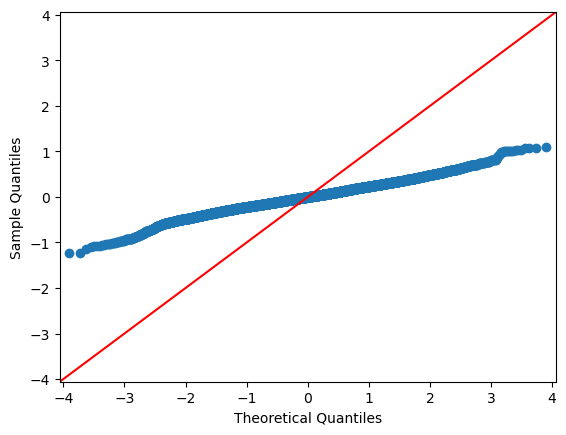

In [170]:
#Check for multivariate normality
sm.qqplot(results_ln.resid, line='45');

<BR>

Lastly, an error metric was examined to determine how well the model performs and can generalize to out-of-sample data. Here, the error metric of interest looked at root mean squared error (RMSE). Per calculations, the RMSE for the training data was 0.2379, and for the testing data, 0.2383. Due to the error values closely mirroring one another, the model can perform well on out-of-sample data.

In [200]:
#Import metric to test
from sklearn.metrics import root_mean_squared_error

#train rmse
yt_pred = results_ln.predict(X_train_ln)
root_mean_squared_error(y_train_ln, yt_pred)

0.23790807376076545

In [202]:
#test rmse
X_test_ln = sm.add_constant(X_test)
X_test_ln = X_test_ln[X_train_ln.columns]
X_test_ln = np.log(X_test_ln)
X_test_ln.const = 1
y_pred = results_ln.predict(X_test_ln)

y_test_ln = np.log(y_test)

root_mean_squared_error(y_test_ln, y_pred)

0.23836043969931253

<BR>

## E. Data Summary and Implications <a class="anchor" id="E"></a>

This analysis aimed to determine factors significantly impacting cubic zirconia sales prices. A linear regression model with significant factors was generated through regression analysis. Two of these factors were carat weight and color. These factors were deemed statistically significant as the results from the linear regression model showed that both had p-values of less than .05. Furthermore, the model's significance was also examined. And with the probability of the F-statistic also less than .05, the model is also significant. Therefore, predictions from the model can be trusted so as not to be due to random chance. Additionally, the model's adjusted R-squared of 0.946 indicates a well-performing model that can explain a lot of the variation of the response variable. Below is the linear regression equation.

$ln(\hat{price})=8.15+1.73*ln(\text{carat weight})+0.24*ln(\text{color grading})$

The coefficients can be interpreted like so (University of Virginia, n.d.):
* Keeping everything constant, for every 1% increase in carat weight, the sales price is increased by about 1.73%.
* Keeping everything constant, for every 1% increase in the color grade, the sales price is increased by about 0.24%.

A limitation of the research involves the analytical technique used, linear regression. Linear regression makes strong assumptions about the linear relationship between the variables, which may not reflect how the variables are perceived. This assumption strongly influences how the model is trained and the predictions that come with it. If underlying relationships are not truly linear, the regression model is not representative and may lead to poor estimates.

Based on the results of this analysis, it is recommended that the model can be used for predictive measures. Further testing could be done further to validate its predictive accuracy on other data before deployment. For future dataset studies, instead of focusing on impactful predictors, other studies could instead focus on generating the best predictive model using different techniques such as random forests or regularization techniques like lasso or ridge regression. Another study point would be employing clustering techniques to better understand the characteristics that make up the different groupings.

<BR>

## F. Sources <a class="anchor" id="F"></a>

Antolik, C. B. (2022, October 18). _Cubic Zirconia Vs. Diamonds_. International Gem Society. https://www.gemsociety.org/article/cubic-zirconia-vs-diamonds/ 

Bobbitt, Z. (2021, November 16). _The Five Assumptions of Multiple Linear Regression_. Statology. https://www.statology.org/multiple-linear-regression-assumptions/

Co-learning Lounge. (2021, January 29). _Gemstone Price Prediction_. Kaggle. https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction/data 

Gemological Institute of America. (2017, October 17). _The History of the 4Cs of Diamond Quality_. GIA 4Cs. https://4cs.gia.edu/en-us/blog/history-4cs-diamond-quality/ 

PFES. (n.d.). _The Ultimate Guide to Data Analytics Tools: Python, R, and Cloud Platforms_. PFES. https://www.pfes.com/post/ultimate-guide-to-data-analytics-tools-python-r-and-cloud-platforms

The Investopedia Team. (2024, June 27). _Variance inflation factor (VIF)_. Investopedia. https://www.investopedia.com/terms/v/variance-inflation-factor.asp

University of Virginia. (n.d.). Interpreting Log Transformations in a Linear Model. Interpreting Log Transformations in a Linear Model | UVA Library. https://library.virginia.edu/data/articles/interpreting-log-transformations-in-a-linear-model 